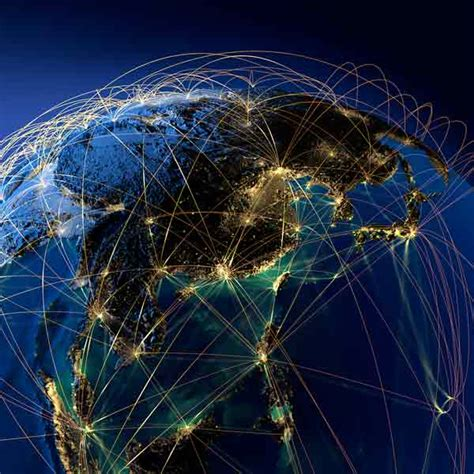

In [1]:
from IPython import display
display.Image("images/flights1.jpeg")

<p style="font-size:9px;">New Spring 22 Notebook for Week 7: Objects.<br />Verion 1, Feb 8, 2022, gb.  Add your edits here.</p>

<h2 style="padding:15px;border-radius:4px;background-color:skyblue;">
Topic 7: Introduction to Objects and Project 1</h2>

<p>The asynch introduced you to
	<ul>
	<li>objects: built into python and those we build ourselves</li>
	<li>their attributes</li>
	<li>methods</li>
	<li>defining a class</li>
	<li>constructing a class</li>
	<li>controlling access to attributes</li>
	<li>use of python's built-in &#95;&#95;str&#95;&#95; and &#95;&#95;repr&#95;&#95;   methods</li>
	</ul>
	as well as the &ldquo;multi-armed bandit problem.&rdquo;</p>
<p>Next week we'll build on the basics of objects to touch on encapsulation, polymorphism, inheritance, magic methods, and other fun things.</p>
<p>How and why use objects?   Discuss.</p>
<blockquote>The benefits include creating code expressions of "real-world objects", adaptability (share your code and build on stable classes), security (data hiding and abstractions to keep others from our data), once in place, more rapid code development.  On the other hand, there can be a steep learning curve, code bloat, a run-time cost, and not suited for all kinds of problems.</blockquote>

<hr />
<h2 style="color:cornflowerblue; padding: 10px;">
    1.  Thinking about objects: decomposition and facet analysis
</h2>
<p>Creating an object should be worth it: will you use it repeatedly? does it represent something in the real-world you can build upon for as a basis for similar things? can you identify (a) the <u>fundamental attributes</u> or properties of the object and (b) the <u>fundamental behaviors</u> or actions of this object?</p>
<p><b>Example</b>: A Flight Tracking Service.  What are the commonalities here?  Flights belong to an airline, have plane types, number of engines, seating capacity, and so on.  And flights do things: they take_off, they land, they can be rerouted, have an arrival status (late, early, ontime), etc.  By defining a class of "flight_routes", we can group all the common attributes and behaviors into a base or parent class; then extend the behaviors as needed for individual or special purposes.  Once the idea of a flight service is defined as having a series of flight_routes, we could also create a base class for the aircraft themselves and so on.</p>

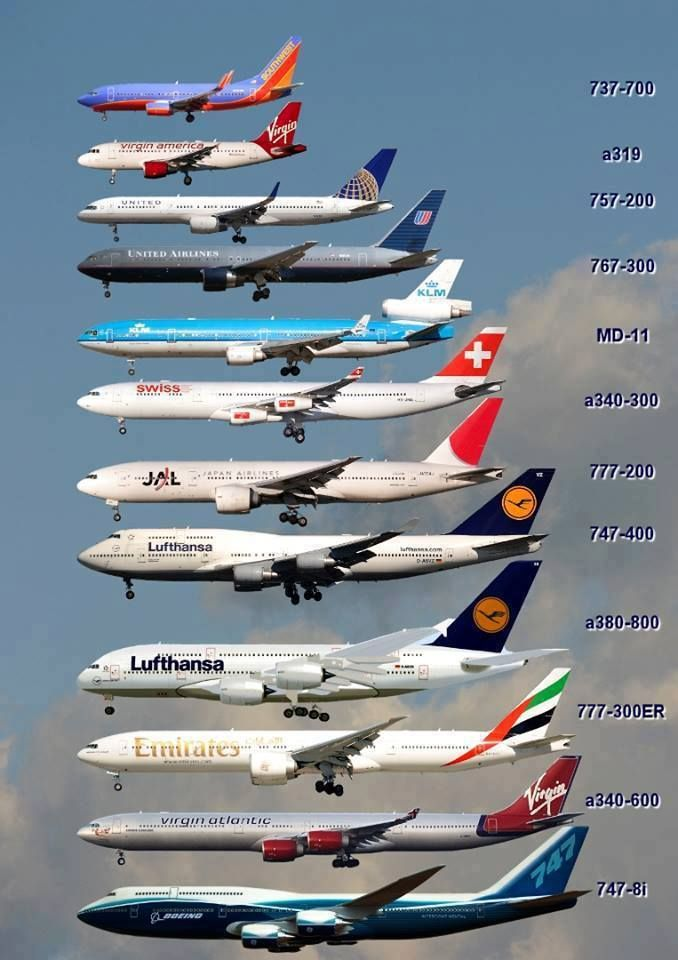

In [2]:
display.Image("images/typesOfAircraft.jpg", width=500)

<p>
    <span style="color:maroon;">Optional:</span>
    Once we have our ideas and have identified the attributes ("facet analysis") and the properties (behaviors or methods), identify the data types <u>and restrictions</u> (such as required, optional, number of permitted copies), as well as any parameters to use when creating an object. There's more than can be done, but start off our thinking ... e.g.,
</p>
<table width='100%'  style="text-align:left;">
    <tr>
        <td colspan="2"  style="text-align:left;">Object: Aircraft</td>
    </tr>
    <tr>
        <td style="text-align:left;">airline</td>
        <td style="text-align:left;">String, 256 chars, required</td>
    </tr>
    <tr>
        <td style="text-align:left;">website</td>
        <td style="text-align:left;">String, 256 chars, required</td>
    </tr>
    <tr>
        <td style="text-align:left;">aircraft_call_no</td>
        <td style="text-align:left;">String, 12 chars, required</td>
    </tr>
    <tr>
        <td style="text-align:left;">aircraft_type</td>
        <td style="text-align:left;">String, 20; [737-700, a310, a320, 757-200, 757-300, MD-11, a340-300, 777-200, ... ]</td>
    </tr>
    <tr>
        <td colspan="2" style="text-align:left;">Yes, this looks like the beginning of a data dictionary; also can be used to start off our class definition models.</td>
    </tr>
</table>
<p>For the actions, identify the more shareable behaviors and likewise identify the parameters, if any.  For instance, if we had a take_off_time() method, we'd probably want to have the date/time stamp passed, and with a default to prevent any later problems.</p>
<p>Finally, we can imagine creating a FlightTracking class. Without defining actual classes for the moment, we can still see that once we have an instance of our FlightTracking class we can start to add individual airlines and their aircrafts: we'd have <u>instances</u> (copies) of our Aircraft class for each of the airlines we track. Something like this...</p>
<pre style="background-color:silver;padding:4px;border-radius:2px;color:maroon;">
ft = FlightTracking()
airline1 = ft.addAircraft( Aircraft("BurningMan Airlines") )
airline1.setAirCraftType('a320')
(...later in our code...)
airline1.setRoute("CDG-BOS", "1000 CET", "1130 EST")
</pre>
<p>Notice the class (object) is defined.  Accessing the <u>members</u> of the class - is accomplished a couple of ways.  For the moment, let's start with the <code>.</code> dot operator.  How would you read this line? <code>airline1.getAircraft()</code>?  The "verb" after the dot is the method and in OOD the dot always says that whatever is to the right of the dot belongs to the class on the left.</p>

<blockquote>
<p>Students with experience with SQL will recognize a similar application.  E.g., two tables, say "clients" and "realtors".  Each of those tables has a field for ID.  How to disambiguate the clients' ID from the realtors'?  The dot!  clients.ID is different from realtors.ID (because the whole string is read as the unique identifier); so we can issue commands like <code>SELECT * from ColdwellBanker WHERE clients.ID = realtors.ID</code>.  Otherwise we'd get a "ambiguous reference" error.</p></blockquote>
<hr />

<hr />
<h2 style="color:cornflowerblue;">
    2.  From ideas about objects to defining one.
</h2>
<h3 style="color:cornflowerblue;">2a. Doc Strings</h3>
<p>As we begin to create our own objects, we want both to remember what we did (grin) and help others use and debug our code by providing <b>DocStrings</b>.</p>
<p>We recommend <u>strongly</u> that you include them in your code.  They help everyone understand and they can be read by python for help and documentation.  As you'll see we can poll our classes and extract the docstring. Some instructors require docstrings in the project.</p>
<pre>
def function_with_docstring(param1, param2):
   """ This function takes a string and 
       param2 as an int """
   
   Args:
       param(1) string: a name
       param(2) int   : age
   Returns:
       bool: True for success, False otherwise
</pre>

<h3 style="color:cornflowerblue;">2b. Real world objects</h3>
<p>
    <ul>
    <li>Objects are things in the real world, captured for computers as &ldquo;<b>classes</b>&rdquo;. </li>
<li>Identify the properties or facets (“tom” is-a cat) and what these objects can do, e.g., (purr(), sleep(), eat()).</li>
<li>In computing, they consist of a hierarchy of a <b>parent class</b> and subsequent <b>child</b> classes.</li>
<li>Defining all the facets and properties in a single piece of code (the object) is <b>encapsulation</b>.</li>
<li>This encapsulated code might be defined with multiple parameters; this is <b>polymorphism</b>.</li>
<li>Objects can have children that inherit all the parent classes’ properties and behaviors and can add new ones to themselves: <b>inheritance</b>.</li>
<li>After defining the Object, we can copy it and use that copy; this is an instance of the class. E.g., my_cat = Cat()</li>
<li>Then we can set/get the various <b>attributes</b> of the class. Next week we delve more deeply into objects.</li>
<li>Remember, when we start our own .py files, we inherit everything from Python's own parent object.  And we can create our own classes.</li>
</ul>
<blockquote style='background-color:skyblue;'>
    <p>We should review the idea of class diagramming, too, to see the how encapsulation as well as relationships and cardinality come into play in defining classes, how they interact, and their documentation. (IMHO).  [Images to be added.]
    </p>
    </blockquote>
<hr />
<h3 style="color:cornflowerblue;">2c.  Constructor and <code>__init__</code></h3><p>
Notice the <code>__init__</code> "constructs" or initializes the object.  The object needs to be aware of itself, hence the keyword <code>self</code>.  All Object-oriented programming languages have constructors: when called, the code interpreter requests from the operating system enough contiguous RAM to hold the object.</p>
<hr />
<p>In the below example,
    <ol>
        <li>identify the base class and constructor</li>
        <li>methods of the class</li>
        <li>instances of the class</li>
        <li>accessing the attributes</li>
        <li>updating a value in a class</li>
</ol>
<hr />
<h2>Building an example.</h2>
<p>Notice each part of the class definition, the use of <code>self</code>, parameters and default parameters that are passinto the class.</p>
</p>
<p>Notice, too, the <u>two instances</u> of a bank.</p>

<p style="font-size:9px;">Updated Feb 19, 2022</p>
<blockquote><h2 style="color:cornflowerblue;">Optional building-up of classes and their interactions</h2>
<p>The next few cells demonstrate using some classes, A, B, C, etc., and noting how they're created, and viewed by other class instances.</p>
</blockquote>

In [18]:
class A:
    def __init__(self):
        self.x = 5
        
class B:
    def __init__(self, x):
        self.x = x
        
class C:
    def __init__(self, x):
        self.x = x
        
class Main:

    a = A()
    b = B(20)
    
    print("\nUsing dot operator")
    print("x from A: ", a.x)
    print("x from B: ",b.x)
    
    # update a's version of x:
    a.x = 99
    print("Updated x from A: ", a.x)
    
    print("\n")

# ---------------
main = Main()


Using dot operator
x from A:  5
x from B:  20
Updated x from A:  99




In [19]:
# demo 2: Note B's instance of C

class A:
    def __init__(self):
        self.x = 5
        
class B:
    def __init__(self, x):
        self.x = x
        self.c = C(100)
        
        print("\nAccess c from B: ",self.c.x)
        
class C:
    def __init__(self, x):
        self.x = x
        
class Main:

    a = A()
    b = B(20)
    
    # access from Main
    print(a.x)
    print(b.x)
    print("\n")
    print(b.c.x)

# ---------------
main = Main()


Access c from B:  100
5
20


100


In [20]:
# demo 3:
# Protecting Variables from others' access

class A:
    def __init__(self):
        self.__x = 5
        
    def getA_valueOfX(self):
        return self.__x
        
    def setA_valueOfX(self, v):
        self.__x = v
        
class B:
    def __init__(self, x):
        self.x = x
        self.c = C(100)
        
        print("\nAccess c from B: ",self.c.x)
        
class C:
    def __init__(self, x):
        self.x = x
        
class Main:

    a = A()
    b = B(20)
    
    # access from Main
    # now a.x throws an error
    # print(a.x)
    # so need a get/set method to retrieve it.
    print("\nGETting protected version of a.x")
    print("\tby using a GET method: ", end="")
    print(a.getA_valueOfX())
    
    print("\nSETting protected version of a.x")
    print("\tby using a SET method: ", end="")
    a.setA_valueOfX(42)
    
    print(a.getA_valueOfX())
    
    print("\nGetting unprotected b with dot: ", end="")
    print(b.x)
    print("\n")

# ---------------
main = Main()


Access c from B:  100

GETting protected version of a.x
	by using a GET method: 5

SETting protected version of a.x
	by using a SET method: 42

Getting unprotected b with dot: 20




In [21]:
# demo 4:
# Getting around protection using decorators
# and __doc__ for docstring

class A:
    """ this class A demos the get and set idea """
    def __init__(self):
        self.__x = 5
        
    def getA_valueOfX(self):
        return self.__x
        
    def setA_valueOfX(self, v):
        self.__x = v

    # using property() to override get/set
    # note the variable affected (the x)
    x = property(getA_valueOfX, setA_valueOfX)
    
        
class Main:

    a = A()

    print(a.x)

# ---------------
main = Main()

print(main.__doc__)

5
None


In [22]:
# demo 5:
# Getting around protection using @ property decorator
# @property by itself acts like a GET
# @<variablename>.setter SETs
# @<variablename>.deleter is a DEL
# added second variable to A for demo of specific control

class A:
    def __init__(self):
        self.__x = 5
        self.__y = "hello"
        
    @property # acts like a get  x.getter?  (no, alas)
    def x(self):
        return self.__x

    @x.setter
    def x(self, newvalue):
        self.__x = newvalue

    @x.deleter
    def x(self):
        del self.__a

class Main:  # Chessboard 

    a = A()
    a.x = 9999
    print(a.x)

# ---------------
main = Main()

# a front door - to control access
# not required, but conceptually better for OOP
"""
if __name__ == "__main__":
    main()

    main = Main()

"""

9999


'\nif __name__ == "__main__":\n    main()\n\n    main = Main()\n\n'

<blockquote><hr />
    <p>End of the building-up set of demos of classes.  On to the discussion example of Banks.</p>
</blockquote>
<hr />
<h2 style="background-color:skyblue;padding:10px; border-radius:2px;">
    Building a Bank Class, methods, class and instance attributes</h2>
<p>Here we create a Bank class, construct it, and allow access into the class data (attributes).</p>

In [3]:
# DEFINE A CLASS
class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute

    def __init__(self, name, city, money_on_hand = 10000):
        self.name = name
        self.city = city
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        self.money_on_hand = money_on_hand
        Bank.preferred_currency = "USD"            # NOTE: Class attribute
                                                   # See the reference to Bank Class
        
    def showBankInfo(self):                        # add a method to get data 
        print(self.name, self.city)

    def how_much_in_vault(self):
        print("$ in vault: ", self.money_on_hand)

    def add_money(self, amount):
        self.money_on_hand += amount
        self.no_of_transactions += 1

""" ------------------------------------------------- """
# TWO INSTANCES of the Bank()
bankOfAmerica = Bank("BoA", "Berkeley")
wellsFargo = Bank("WF", "San Francisco")

# ACCESSING THE ATTRIBUTES using a dot operator
print(bankOfAmerica.city)
print(wellsFargo.city)

# UPDATING A VALUE
bankOfAmerica.city = "Bakersfield"
print("\nAfter moving the bank to the Valley: ", bankOfAmerica.city)


Berkeley
San Francisco

After moving the bank to the Valley:  Bakersfield


<p>The goal here is to get a sense of the framework of all classes.  Next we see how the classes we define inherit lots of attributes and methods from python's object.  Use these "dunder" and "magic methods" to peek inside the objects and to overwrite default behaviors.</p>

<hr />
<h2 style="color:cornflowerblue;">3.  Building Classes</h2>
<p>Notice this example: <code>BoM = Bank("Bank of Monterey", "Monterey")</code>
</p>
<ol>
    <li>The <b>base class</b> is "class Bank".</li>
    <li><b>Instantiate</b> an individual copy of a bank from the base: 
        <code>BoM = Bank("BoM", "Seaside")</code>
    </li>
    <li>Review the <b>type</b> of an object and see the dunder 
        <code>__main__</code>:
        <pre>&lt;BoM&gt; has type <code>'__main__.Bank'</code>
        </pre>
    </li>
    <li>We can modify <b>all</b> instances by changing a Class attribute: 
        <code>Bank.preferred_currency = "EUR"</code>
    </li>
    <li>Modify an <b>individual instance</b>: 
        <code>BoM.preferred_curency = 'CDN'</code>
    </li>
</ol>
<hr />
<p style="color:maroon;">Optional - a glimpse into the many windows into our objects.</p>
<p>But note the <code>__str__</code> and <code>__repr__</code> attributes that all of our objects inherit and which we can overwrite. </p>

In [4]:
# WE GET A LOT OF INFO ABOUT OUR CLASSES ... 
# review the list - you'll see many __attributes__
# we inherit from Python using a class method
# ----- And at the end you'll see attributes and methods
# from our own script.

BoM = Bank("Bank of Monterey", "Monterey")
dir(BoM)  # this is a class method

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_money',
 'city',
 'how_much_in_vault',
 'money_on_hand',
 'name',
 'no_of_transactions',
 'preferred_currency',
 'showBankInfo',
 'total_branches']

In [5]:
print("Get all the attributes ... ")
print(BoM.__dict__)  # this is an attribute information

print("\nOur object is an instance of what class?")
print(BoM.__class__)

print("\n", BoM.__doc__)  # docstring

Get all the attributes ... 
{'name': 'Bank of Monterey', 'city': 'Monterey', 'no_of_transactions': 0, 'money_on_hand': 10000}

Our object is an instance of what class?
<class '__main__.Bank'>

  Base class for all banks 


In [6]:
# How about getting class documentation?
# You'll notice a box appear at the bottom of 
# the Notebook.

?Bank

<h2 style="color:cornflowerblue;">4.  __str__ and __repr__</h2>

<p>These are two windows into an object.  <code>__str__</code> is intended for human-end users of the objects and useful for logging or running records about your data.  The <code>__repr__</code> is intended for programmers and a way to show data about the object itself.  In practice some coders just use the same string output for both; others don't.  But that's the rationale behind them both.</p>
<br />
<p>Given this example about our Bank ... </p>
<pre style="color:cornflowerblue;">
class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute
    <br />
    def __init__(self, name, city, street):
        self.name = name
        self.city = city
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        Bank.preferred_currency = "USD"            # NOTE: Class attribute
...
</pre>
<p>Notice we&rsquo;ll add a way to get more access and info into our own defined classes.</p>
<p>Rather than access the attribute directly, it&rsquo;s preferred to use a method version, e.g., <code><i>x</i>.__str__()</code>.  (Why? cause Python lets us be sloppy in coding to get the job done but there&rsquo;s also the syntactically consistent, preferred ways that support the concepts of OOD.)</p>

In [7]:
class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute
    
    def __init__(self, name, city, street):
        self.name = name
        self.city = city
        self.street = street
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        Bank.preferred_currency = "USD"            # NOTE: Class attribute
        
    def __str__(self):
        return f'This branch is in {self.city}, on {self.street}. '+\
        'Passez chez nous!  来吧！ चलो! '
    
    def __repr__(self):
        # note: if we return (str(self) - we call the actual __str__!)
        #return str(self)
        bankinfo = str(Bank.__dict__)
        stmt = "\nThe repr is for programmers, so how 'bout coder stuff? \n" + bankinfo
        return stmt
    
    # python prefers
    # our_local_branch()
    def ourLocalBranch(self, CountryInfo):
        self.localBranchInfo = CountryInfo
        print("Now adding the local info to this bank.")
        print("* Hey, Muggsie, I'm in the vault! ", CountryInfo.getCountryInfo("[Inside the Bank]"))

    
class CountryInfo:
    """ begin to internationalize our data """
    def __init__(self, engName, isoName, localName):
        self.engName = engName
        self.isoName = isoName
        self.localName = localName
        
    def getCountryInfo(self, id="[Outside on the Champs Elysées - in Class]"):
        return id + " getCountryInfo called: "+self.engName + " ("+self.isoName+") "+self.localName

In [9]:
b = Bank("Newport Savings", "Middletown", "Main St")

print("-"*40, "\nCalling str:")
print(b.__str__())

print("-"*40, "\nCalling repr:")
print(b.__repr__())

---------------------------------------- 
Calling str:
This branch is in Middletown, on Main St. Passez chez nous!  来吧！ चलो! 
---------------------------------------- 
Calling repr:

The repr is for programmers, so how 'bout coder stuff? 
{'__module__': '__main__', '__doc__': ' Base class for all banks ', 'total_branches': 0, '__init__': <function Bank.__init__ at 0x7fb471861ca0>, '__str__': <function Bank.__str__ at 0x7fb471861b80>, '__repr__': <function Bank.__repr__ at 0x7fb471861dc0>, 'ourLocalBranch': <function Bank.ourLocalBranch at 0x7fb471861ee0>, '__dict__': <attribute '__dict__' of 'Bank' objects>, '__weakref__': <attribute '__weakref__' of 'Bank' objects>, 'preferred_currency': 'USD'}


In [10]:
print(b)

This branch is in Middletown, on Main St. Passez chez nous!  来吧！ चलो! 


<hr />
<h2 style="background-color:skyblue;padding:10px;border-radius:4px;">Updated Examples of str and repr</h2>
<p style="font-size:9px;">Feb 19, 2022</p>
<p>The next few cells demonstrate the differences and similarities of str and repr.</p>

In [12]:
""" 1.
    THIS EXAMPLE HERE HAS NO __STR__ and NO __REPR__ DEFINED ... 
"""

class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute
    
    def __init__(self, name, city, street):
        self.name = name
        self.city = city
        self.street = street
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        Bank.preferred_currency = "USD"            # NOTE: Class attribute

    def ourLocalBranch(self, CountryInfo):
        self.localBranchInfo = CountryInfo
        print("Now adding the local info to this bank.")
        print("* Hey, Muggsie, I'm in the vault! ", CountryInfo.getCountryInfo("[Inside the Bank]"))

class CountryInfo:
    """ begin to internationalize our data """
    def __init__(self, engName, isoName, localName):
        self.engName = engName
        self.isoName = isoName
        self.localName = localName
        
    def getCountryInfo(self, id="[Outside on the Champs Elysées - in Class]"):
        return id + " getCountryInfo called: "+self.engName + " ("+self.isoName+") "+self.localName

In [13]:
b = Bank("Fresno", "Dexter", "Jones St.")

print("\n","-"*40, "\nCalling str:")
print(b.__str__)

print("\n","-"*40, "\nCalling str():")
print(b.__str__())

print("\n","-"*40, "\nCalling repr:")
print(b.__repr__)

print("\n","-"*40, "\nCalling repr():")
print(b.__repr__())


 ---------------------------------------- 
Calling str:
<method-wrapper '__str__' of Bank object at 0x7fb471cc9340>

 ---------------------------------------- 
Calling str():

 ---------------------------------------- 
Calling repr:
<method-wrapper '__repr__' of Bank object at 0x7fb471cc9340>

 ---------------------------------------- 
Calling repr():


In [14]:
""" 2.
    THIS IS THE BANK AGAIN BUT WITH __STR__ AND __REPR__ RETURNS str(self)
"""

class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute
    
    def __init__(self, name, city, street):
        self.name = name
        self.city = city
        self.street = street
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        Bank.preferred_currency = "USD"            # NOTE: Class attribute
        
    def __str__(self):
        """ NOTICE THIS STR HAS OUR STRING THAT WILL BE SHOWN """
        return f'THIS IS STR - This branch is in {self.city}, on {self.street}.'
    
    def __repr__(self):
        # NOTE HERE - REPR IS CALLING UP TO STR
        # note: if we return (str(self) - we call the actual __str__!)
        return (str(self))
    
b = Bank("Anahit", "Milano", "via Laban")
print(b.__str__)

print("\n---- now calling __repr__ that itself calls __str__ ")
print(b.__repr__)

<bound method Bank.__str__ of THIS IS STR - This branch is in Milano, on via Laban.>

---- now calling __repr__ that itself calls __str__ 
<bound method Bank.__repr__ of THIS IS STR - This branch is in Milano, on via Laban.>


In [15]:
""" 3.
    THIS IS THE BANK AGAIN BUT WITH __STR__ AND __REPR__ DEFINED 
"""

class Bank:
    """ Base class for all banks """
    total_branches = 0                             # NOTE: Class Attribute
    
    def __init__(self, name, city, street):
        self.name = name
        self.city = city
        self.street = street
        self.no_of_transactions = 0                # NOTE: Instance Attribute
        Bank.preferred_currency = "USD"            # NOTE: Class attribute
        
    def __str__(self):
        """ NOTICE THIS STR HAS OUR STRING THAT WILL BE SHOWN """
        return f'This branch is in {self.city}, on {self.street}.'
    
    def __repr__(self):
        bankinfo = str(Bank.__dict__)
        stmt = "\nThe repr is for programmers, so how 'bout coder stuff? \n" + bankinfo
        return stmt

b = Bank("Banque de Montréal", "rue Javier", "Lu Estates")

print("\n","-"*30)
print("Calling __str__:\n")
print(b.__str__)

print("\n","-"*30)
print("Calling __repr__:\n")
print(b.__repr__)

print("\n","-"*30)
print("Calling __str__():\n")
print(b.__str__())


print("\n","-"*30)
print("Calling __repr__():\n")
print(b.__repr__())



 ------------------------------
Calling __str__:

<bound method Bank.__str__ of 
The repr is for programmers, so how 'bout coder stuff? 
{'__module__': '__main__', '__doc__': ' Base class for all banks ', 'total_branches': 0, '__init__': <function Bank.__init__ at 0x7fb4723e09d0>, '__str__': <function Bank.__str__ at 0x7fb4723e0a60>, '__repr__': <function Bank.__repr__ at 0x7fb4723e0af0>, '__dict__': <attribute '__dict__' of 'Bank' objects>, '__weakref__': <attribute '__weakref__' of 'Bank' objects>, 'preferred_currency': 'USD'}>

 ------------------------------
Calling __repr__:

<bound method Bank.__repr__ of 
The repr is for programmers, so how 'bout coder stuff? 
{'__module__': '__main__', '__doc__': ' Base class for all banks ', 'total_branches': 0, '__init__': <function Bank.__init__ at 0x7fb4723e09d0>, '__str__': <function Bank.__str__ at 0x7fb4723e0a60>, '__repr__': <function Bank.__repr__ at 0x7fb4723e0af0>, '__dict__': <attribute '__dict__' of 'Bank' objects>, '__weakref__':

<hr /><h3 style="color:cornflowerblue;">Extra fun!</h3>
<p>For some fun, notice here there's a class defined for country information (called CountryInfo).  There's a method in that class called getCountryInfo().  Because Banks can be anywhere they might need local info ... so we could create an instance of the CountryInfo class and include inside the Bank branch.  Notice the two calls to the "getCountryInfo()" method and see which is called when and how.
</p>

In [146]:
print("-"*40,"\n\n")
b = Bank("BNParis","Paris", "rue du Nul")
info = CountryInfo("France", "FR", "République française")

b.ourLocalBranch(info)
print("\nData from inside the CountryInfo object: ", info.getCountryInfo())

---------------------------------------- 


Now adding the local info to this bank.
* Hey, Muggsie, I'm in the vault!  [Inside the Bank] getCountryInfo called: France (FR) République française

Data from inside the CountryInfo object:  [Outside on the Champs Elysées - in Class] getCountryInfo called: France (FR) République française


<hr />
<h2 style="background-color:skyblue;padding:15px;border-radius:4px;">Project 1: Multi-armed Bandit Contest</h2>
<p>Python has a built-in random method ... yet we can anticipate some of the most useful libraries in python: numpy and pandas.  In the asynch you heard about the numpy library (as well as the convention of using an alias, e.g., <code>import numpy as np</code>).</p>
<p>In the bandit question, there&rsquo;s the Bandit class and the Solver class.</p>
<p>Note that the we have data members that are "protected" by using the _ as the first part of their names.  Even tho python has no really strict way to hide variables we can try to make them as least public as possible (aka "data mangling"... by prefacing them with a _, [<i>but we're <u>not</u> getting into the myriad uses of _ and __ to rewrite a variable, etc.</i>] e.g., 
    <pre>
    class Mozart:
        # protected data members
        _enemy = "Salieri"
        
        def lifeAndTimes(self, event):
           print("Today's ",event, " was sponsored by ", self._enemy)
           
     composer = Mozart()
     composer.lifeAndTimes("Murder")
     </pre>
     

<hr />
<h2 style="background-color:skyblue;padding:15px;border-radius:4px;">End of the Main Content</h2>
<hr />
<h3 style="color: white; background-color:skyblue;padding:15px;border-radius:4px;">Recap</h3>
<ul>
    <li>Intro to Objects in general: attributes and methods</li>
<li>Defining an Object</li>
<li>Doc Strings</li>
<li>Objects: encapsulation, polymorphism, inheritance</li>
<li>Object Construction and __init__</li>
<li>Bank example</li>
<li>__str__ and __repr__</li>
    <li>Bank again with 2nd object, CountryInfo</li>
    <li>Project 1: Multi-armed Bandit</li>
    </ul>
<p>Can you identify or create ... </p>
<ul>
    <li>what and why do we have Object-Oriented Programming?</li>
    <li>what's the relationship between python's objects and our own?</li>
    <li>what are the properties of all objects in OOD</li>
    <li>do you feel comfortable creating your own objects? And accessing the data therein?</li>
    <li>What's the purpose (and similarities) of __str__ and __repr__?</li>
</ul>
    

<hr />
<h2 style="color:cornflowerblue;">Singly-Linked List demo</h2>
<p>This isn't quite finished but ... the singly-linked list is a dynamic data structure consisting of a set of <b>nodes</b>.  Each node has two parts: a data value and a pointer or reference to the next pointer in a linear sequence. E.g., <pre>[Head|->] [5|->node_at_y1] [7|->node_at_x2] [Tail|->NULL</pre>
</p>
<p>The only reason this is demo'd here is show that we can store references to our nodes as objects in a list and then pop them off the list and reconstruct them as Nodes to extract data and references.</p>

In [1]:
%%bash
python3 linkedlist1.py





--------------------------------------------------

Welcome to the Singly Linked List Q&A
	We start off with no nodes ... if none, create one and start at the Head.
	Notice new nodes are pushed at the head; they're popped from the head, too.
	A node is shown here with two parts [value|•>pointer 	to next node].



	[Head|•>]  [1|•>]  [2|•>]  [4|•>]  [3|•>]  [6|•>] [(tail)Null]

	Showing your list ... There are  5  nodes in your singly-linked list.

	 ----------------------------------------



 	Let's PUSH a new Node with value of 999 for demo.
 [999|•>] 
	Confirm there are now there are  6 nodes.

	[Head|•>]  [999|•>]  [1|•>]  [2|•>]  [4|•>]  [3|•>]  [6|•>] [(tail)Null]





 	Let's POP a new Node ... removing the one closest to the head.

	Confirm there are now there are  6 nodes.

	[Head|•>]  [1|•>]  [2|•>]  [4|•>]  [3|•>]  [6|•>] [(tail)Null]




<pre>
import random
import numpy as np

#Singly-linked list 

class Node:
	def __init__(self, data, nextNode = None):
		self.data = data
		self.nextNode = nextNode
		
	def getData(self):
		return self.data
		
	def setData(self, val):
		self.data = val
		
	def getNextNode(self):
		return self.nextNode
		
	def setNextNode(self, val):
		self.nextNode = val
		
class SinglyLinkedList:
	listOfNodes = []  """ HERE IS THE LIST OF NODES """
	
	def __init__(self, head = None):
		self.head = head
		self.size = 0
		
	def getSize(self):
		return self.size
		
	def addNode(self, data, isPush = False):
		newNode = Node(data, self.head)
		self.head = newNode
		print(" ["+ str(data) + "|•>] ",end="")
		self.size += 1
		if isPush:
			self.listOfNodes.insert(0, newNode)
		else:
			self.listOfNodes.append(newNode)
		return True
		
	def printNode(self):
		curr = self.head
		while curr:
			curr = curr.getNextNode()

	def popNode(self):
		self.listOfNodes.pop(0)

""" --------------------------------------------------------- """
def main():
	
	 create a random list of values to create new nodes
	l = random.sample(range(0, 10), 5)

	# -------- create the sll ---------
	listDemo1 = SinglyLinkedList()

	# create the nodes ...
	print("[Head|•>]", end="")
    
	for i in l:
		listDemo1.addNode(i)
        
	print("[(tail)Null")

	print("Showing your list ... There are ",listDemo1.getSize()," nodes in your singly-linked list.\n")
	print("Let's PUSH a new Node with value of 999 for demo.")
	listDemo1.addNode(999, True)

	print("Confirm there are now there are ", listDemo1.getSize(), "nodes.")

	# convert our list of nodes back into Nodes themselves to use their methods.
	length = len(listDemo1.listOfNodes)
	print("[Head|•>] ", end="")
	for i in range(length):
		tempNode = listDemo1.listOfNodes[i]
		#print(tempNode.getData())
		print(" ["+ str(tempNode.getData())+ "|•>] ",end="")
	print("[(tail)Null"]\n\n")
		

	### -----------------------------------------------------
	# POP A NODE FROM THE HEAD 
	print("\n"*3, "\tLet's POP a Node ... removing the one closest to the head.")
	listDemo1.popNode()

	print("\n\tConfirm there are now there are ", listDemo1.getSize(), "nodes.")

	# convert our list of nodes back into Nodes themselves to use their methods.
    # for each node entry in the list, I can grab it, convert it back to Node, and get the Data...
    
	length = len(listDemo1.listOfNodes)
	print("\n\t[Head|•>] ", end="")
    
	for i in range(length):
		tempNode = listDemo1.listOfNodes[i]
		#print(tempNode.getData())
		print(" ["+ str(tempNode.getData())+ "|•>] ",end="")
          
	print("[(tail)Null"]\n\n")
	


if __name__ == "__main__":
	main()
</pre>

<hr /><p>Next week we look at polymorphism, inheritance, super(), and <i>many</i> get/set combinations.</p>
<p style="font-size:9px;">End of the notebook.  Feb 14, 2022</p>

<hr />
<h2>Midterm Prep</h2>
<p>The midterm is open book.  You're asked to work alone, tho.</p>
<p>Less difficult that before and certainly shorter! I believe there are 3 questions that will tax you on
<ul><li>using our data structures efficiently</li>
    <li>counting and frequencies</li>
    <li>extracting data from these data structures</li>
    <li>formatting output, including floating point values</li>
    <li>you'll have to think about extracting data from these structures and subsetting some of those data</li>
    <li>&Theta;(<i>n</i><sup>2</sup>): can you improve upon this?</li>
    </ul>
<hr />
<h2>Project 1</h2>
<p>Suggestion: write out the steps (pseudocode).  You're assigned class names to use as well as some method names.  What attributes will each Class need?  I think you'll want to apply iterating over a list, value checking, and particularly how you create objects and pass them or their reference in the Auction game.</p>
<hr />
<h2 style="color:forestgreen;">Good luck!</h2>
<hr />

In [7]:
grid = []
row = []
for i in range(5):
    grid.append(row)
for li in grid:
    print(id(li))

140185283886528
140185283886528
140185283886528
140185283886528
140185283886528


<hr />
<p>Counting Frequencies is important and there are lots of ways to do so ... </p>

In [19]:
# counting frequencies is done a lot of ways!
def count_the_frequencies(inputstr):
  
    # break the string into list of words
    list_of_terms = inputstr.split()
  
    # gives set of unique words
    unique_words = set(list_of_terms)
      
    for words in unique_words:
        print(words,":", list_of_terms.count(words))
  
# start here - parse a George Washington speech
if __name__ == "__main__":
      
    str = "While I give you these assurances, and pledge myself in the most unequivocal manner, to exert whatever ability I am possessed of, in your favor—let me entreat you, Gentlemen, on your part, not to take any measures, which, viewed in the calm light of reason, will lessen the dignity, & sully the glory you have hitherto maintained—let me request you to rely on the plighted faith of your Country, and place a full confidence in the purity of the intentions of Congress…"
      
    # calling the freq function
    count_the_frequencies((str.lower()))

pledge : 1
sully : 1
purity : 1
myself : 1
faith : 1
i : 2
& : 1
of, : 1
which, : 1
have : 1
full : 1
in : 4
ability : 1
any : 1
country, : 1
of : 4
entreat : 1
glory : 1
to : 3
will : 1
hitherto : 1
exert : 1
your : 3
favor—let : 1
not : 1
dignity, : 1
whatever : 1
give : 1
lessen : 1
viewed : 1
most : 1
intentions : 1
and : 2
request : 1
assurances, : 1
you, : 1
measures, : 1
rely : 1
confidence : 1
calm : 1
part, : 1
these : 1
reason, : 1
while : 1
congress… : 1
gentlemen, : 1
place : 1
maintained—let : 1
unequivocal : 1
the : 7
manner, : 1
light : 1
plighted : 1
possessed : 1
am : 1
take : 1
a : 1
you : 3
me : 2
on : 2


In [22]:
def count(elements):
    # check if each word has '.' at its last. If so then ignore '.'
    if elements[-1] == '.':
        elements = elements[0:len(elements) - 1]
   
    # if there exists a key as "elements" then simply
    # increase its value.
    if elements in dictionary:
        dictionary[elements] += 1
   
    # if the dictionary does not have the key as "elements" 
    # then create a key "elements" and assign its value to 1.
    else:
        dictionary.update({elements: 1})
   
   
# driver input to check the program.
   
str = "While I give you these assurances, and pledge myself in the most unequivocal manner, to exert whatever ability I am possessed of, in your favor—let me entreat you, Gentlemen, on your part, not to take any measures, which, viewed in the calm light of reason, will lessen the dignity, & sully the glory you have hitherto maintained—let me request you to rely on the plighted faith of your Country, and place a full confidence in the purity of the intentions of Congress…"
   
# Declare a dictionary
dictionary = {}
   
# split all the word of the string.
lst = str.split()
   
# take each word from lst and pass it to the method count.
for elements in lst:
    count(elements)
   
# print the keys and its corresponding values.
print("Frequencies ... ")
for allKeys in dictionary:
    print (allKeys, end = " ")
    print (":", end = " ")
    print (dictionary[allKeys], end = " ")
    print() 

Frequencies ... 
While : 1 
I : 2 
give : 1 
you : 3 
these : 1 
assurances, : 1 
and : 2 
pledge : 1 
myself : 1 
in : 4 
the : 7 
most : 1 
unequivocal : 1 
manner, : 1 
to : 3 
exert : 1 
whatever : 1 
ability : 1 
am : 1 
possessed : 1 
of, : 1 
your : 3 
favor—let : 1 
me : 2 
entreat : 1 
you, : 1 
Gentlemen, : 1 
on : 2 
part, : 1 
not : 1 
take : 1 
any : 1 
measures, : 1 
which, : 1 
viewed : 1 
calm : 1 
light : 1 
of : 4 
reason, : 1 
will : 1 
lessen : 1 
dignity, : 1 
& : 1 
sully : 1 
glory : 1 
have : 1 
hitherto : 1 
maintained—let : 1 
request : 1 
rely : 1 
plighted : 1 
faith : 1 
Country, : 1 
place : 1 
a : 1 
full : 1 
confidence : 1 
purity : 1 
intentions : 1 
Congress… : 1 


In [30]:
from collections import Counter

inputstr = "While I give you these assurances, and pledge myself in the most unequivocal manner, to exert whatever ability I am possessed of, in your favor—let me entreat you, Gentlemen, on your part, not to take any measures, which, viewed in the calm light of reason, will lessen the dignity, & sully the glory you have hitherto maintained—let me request you to rely on the plighted faith of your Country, and place a full confidence in the purity of the intentions of Congress…"
list_of_terms = inputstr.split()

print("-"*40,"\nVersion 1\n")
cnt = Counter()
for word in list_of_terms: 
    cnt[word] += 1
print(cnt)

# second version
print("\n\n","-"*40,"\nVersion 2 - with dictionary \n")
dictionaryVersion = dict()

for word in list_of_terms:
    if word in dictionaryVersion:
        dictionaryVersion[word] = dictionaryVersion[word] + 1
    else: # add to dictionary and count 1
        dictionaryVersion[word] = 1
    
# show our new frequencies from dictionary
for key in list(dictionaryVersion.keys()):
    print(key, ":", dictionaryVersion[key])
    
print("\n\nSorted by count\n")
{key: value for key, value in sorted(dictionaryVersion.items(), key = lambda item: item[1])}

---------------------------------------- 
Version 1

Counter({'the': 7, 'in': 4, 'of': 4, 'you': 3, 'to': 3, 'your': 3, 'I': 2, 'and': 2, 'me': 2, 'on': 2, 'While': 1, 'give': 1, 'these': 1, 'assurances,': 1, 'pledge': 1, 'myself': 1, 'most': 1, 'unequivocal': 1, 'manner,': 1, 'exert': 1, 'whatever': 1, 'ability': 1, 'am': 1, 'possessed': 1, 'of,': 1, 'favor—let': 1, 'entreat': 1, 'you,': 1, 'Gentlemen,': 1, 'part,': 1, 'not': 1, 'take': 1, 'any': 1, 'measures,': 1, 'which,': 1, 'viewed': 1, 'calm': 1, 'light': 1, 'reason,': 1, 'will': 1, 'lessen': 1, 'dignity,': 1, '&': 1, 'sully': 1, 'glory': 1, 'have': 1, 'hitherto': 1, 'maintained—let': 1, 'request': 1, 'rely': 1, 'plighted': 1, 'faith': 1, 'Country,': 1, 'place': 1, 'a': 1, 'full': 1, 'confidence': 1, 'purity': 1, 'intentions': 1, 'Congress…': 1})


 ---------------------------------------- 
Version 2 - with dictionary 

While : 1
I : 2
give : 1
you : 3
these : 1
assurances, : 1
and : 2
pledge : 1
myself : 1
in : 4
the : 7
most : 

{'While': 1,
 'give': 1,
 'these': 1,
 'assurances,': 1,
 'pledge': 1,
 'myself': 1,
 'most': 1,
 'unequivocal': 1,
 'manner,': 1,
 'exert': 1,
 'whatever': 1,
 'ability': 1,
 'am': 1,
 'possessed': 1,
 'of,': 1,
 'favor—let': 1,
 'entreat': 1,
 'you,': 1,
 'Gentlemen,': 1,
 'part,': 1,
 'not': 1,
 'take': 1,
 'any': 1,
 'measures,': 1,
 'which,': 1,
 'viewed': 1,
 'calm': 1,
 'light': 1,
 'reason,': 1,
 'will': 1,
 'lessen': 1,
 'dignity,': 1,
 '&': 1,
 'sully': 1,
 'glory': 1,
 'have': 1,
 'hitherto': 1,
 'maintained—let': 1,
 'request': 1,
 'rely': 1,
 'plighted': 1,
 'faith': 1,
 'Country,': 1,
 'place': 1,
 'a': 1,
 'full': 1,
 'confidence': 1,
 'purity': 1,
 'intentions': 1,
 'Congress…': 1,
 'I': 2,
 'and': 2,
 'me': 2,
 'on': 2,
 'you': 3,
 'to': 3,
 'your': 3,
 'in': 4,
 'of': 4,
 'the': 7}